In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib as mpl
from floquet_simulations.flux_functions import *
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.plot_functions import PlotParams
from floquet_simulations.hamiltonians import ConvertComplex
from mpl_toolkits.axes_grid1 import make_axes_locatable
PlotParams(fontsize=9)

In [2]:
omega0 = 8
alpha=1; beta=2
data_dir = Path().absolute().parent.parent.parent/"paper_data"/f"Heff_omega={omega0},alpha={alpha},beta={beta}.csv"
df = pd.read_csv(data_dir,
                  index_col=False,
                   converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex
                   }
                  )
df["phi3/pi"]= np.round(df["phi3/pi"], 2)
df["xi"] =  np.angle(df["FT-J23"].to_numpy()*df["FT-J12"].to_numpy()*df["FT-J31"].to_numpy())


In [17]:
r10=0.5
r20= 0.3
radius = 0.05
dfP = df[(df.A2 <=70)
         &(df.A3 <=70)
        #  &(df.A3 == 30)
         &((df["FT-LowerT.X"] - r10)**2 + (df["FT-LowerT.Y"] - r20)**2 <= radius**2)
        ]

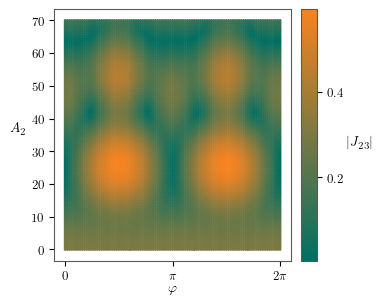

In [16]:

fontsize=10
PlotParams(fontsize=fontsize)

X_flat = np.array(dfP["phi3/pi"].to_list())
Y_flat = np.array(dfP.A2.to_list())


#set colour axis
colour_flat = np.array(np.abs(dfP["FT-J23"].to_list()))
# colour_flat = np.array(dfP.A3.to_list())

minn, maxx = colour_flat.min(), colour_flat.max()
norm = mpl.colors.Normalize(minn, maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)

figsize=(10,8)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit), tight_layout=True)
ax.scatter(X_flat, Y_flat, c=colour_flat, s = 1, alpha=1, norm=norm, cmap=cmap)
ax.set_xlabel(r'$\varphi$', labelpad = 0.00000001, rotation=0)
ax.set_ylabel(r'$A_2$', labelpad = 10, rotation = 0)
# ax.tick_params(axis="x", pad = 0.001)
# ax.tick_params(axis="y", pad = 0.001)

ax.set_xticks(np.linspace(0,2,3), labels=["0",r"$\pi$", r"$2\pi$"])
# ax.set_yticks([0,1], labels=["0", r"$1$"])

# ax.set_xlim((0,1))
# ax.set_ylim((0,1))

# ax.set_xlabel(r'$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$', labelpad = 0.0001, rotation=0, fontsize=fontsize*1.5)
# ax.set_ylabel(r'$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 14, rotation = 0, fontsize=fontsize*1.5)

colourbar_pad = 0.1; colourbar_size_percentage=7
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks = np.linspace(0,1,6))
# cbar.ax.set_yticklabels([r"$0$", r"$6$", r"$12$", r"$18$", r"$\ast$"])
cbar.ax.set_ylabel(r"$|J_{23}|$", rotation=0, labelpad=12)


# fig.savefig(Path().absolute().parent.parent/"figures"/"paper"/"2d_tunnelling_cover_alpha=beta_A2.pdf", format="pdf", bbox_inches="tight")
plt.show()